In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
import os
import seaborn as sns 
%matplotlib inline

In [16]:
oDataPath = os.getcwd()+'/original_data1.csv'
odataset = pd.read_csv(oDataPath,index_col=0)

In [3]:
odataset.index = odataset.index.to_datetime()#index转换成时间格式

/Users/xhxt2008/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  """Entry point for launching an IPython kernel.


In [4]:
pdata = odataset.pct_change(fill_method ='ffill').fillna(method = 'ffill')[21:].fillna(method = 'bfill')

In [112]:
pdata.to_csv('data/pdata.csv',encoding = "utf-8")

In [55]:
# pdata.Close.head(),(odataset.Close[21:].head() - odataset.Close[21:].shift().head()) / odataset.Close[21:].shift().head()

(1987-10-01    0.016531
 1987-10-02    0.000678
 1987-10-05   -0.000307
 1987-10-06   -0.034676
 1987-10-07    0.000961
 Name: Close, dtype: float64, 1987-10-01         NaN
 1987-10-02    0.000678
 1987-10-05   -0.000307
 1987-10-06   -0.034676
 1987-10-07    0.000961
 Name: Close, dtype: float64)

##  补Y值

In [17]:
#读Y值
Close = odataset.Close
Close= Close.pct_change()
Y = Close[21:]

In [11]:
#改Y值的index，我们要预测的是第二天的close价格
newIndex = Y.index.insert(0,pd.Timestamp('1987-09-30'))[:-1]
Y.index = newIndex
Y = Y.rename('Close_Y')

In [12]:
#最后一天没有Y值要去掉
pdata = pdata.join(Y)
pdata = pdata[:-1]

In [13]:
pdata = pdata.drop(['GASREGCOVW','STLFSI','USRECDP','USRECDM','DTB3'],axis=1)#后三个ptc出错

In [14]:
pdata.shape

(7625, 97)

In [15]:
pdata.to_csv('data/processed_data1.csv',encoding = "utf-8")

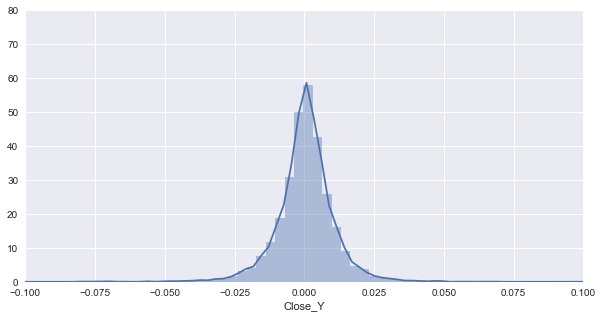

In [14]:
fig, axes = plt.subplots(figsize=(10, 5))
plt.axis([-0.1,0.1,0,80])
sns.distplot(pdata.Close_Y,bins=100)

In [24]:

Y_class =[]
for values in pdata.Close_Y:
    if values>=-0.003 and values<=0.003:
        Y_class.append(0)
    elif values>0.003 and values<=0.01:
        Y_class.append(1)
    elif values>=-0.01 and values<-0.003:
        Y_class.append(-1)
    elif values> 0.01:
        Y_class.append(2)
    elif values<-0.01:
        Y_class.append(-2)
       # print('highDown')
    else:
        print('ok')
   
        

In [56]:
def classes2(increace_rate):
    Y_class =[]
    for values in increace_rate:
        if values<0:
            Y_class.append(0)
        elif values>=0:
            Y_class.append(1)
        else:
            print('ok')
    return Y_class 
        

In [34]:
pdata['Y_class'] = Y_class
noNeed = pdata.pop('Close_Y')

In [37]:
pdata.Y_class.value_counts()

 0    2542
 1    1784
-1    1446
 2     969
-2     884
Name: Y_class, dtype: int64

In [36]:
pdata.to_csv('data/processed_class1.csv',encoding = "utf-8")#加了class

## 标准化数据

In [38]:
Y = pdata.pop('Y_class')
index = pdata.index
columns = pdata.columns

In [39]:
from sklearn.preprocessing import StandardScaler
#fit_transform
scaler = StandardScaler()
scaler_data = scaler.fit_transform(pdata)

In [40]:
pdata

,Close,DFF,DGS5,DGS10,TEDRATE,DPRIME,DCOILWTICO,DTWEXM,USEPUINDXD,M1,...,RHORUSQ156N,RHVRUSQ156N,RRVRUSQ156N,A137RC1Q027SBEA,A145RC1Q027SBEA,ASPUS,B908RL1Q225SBEA,B684RL1Q225SBEA,W243RA3Q086SBEA,W241RA3Q086SBEA
1987-10-01,0.016531,-0.079952,0.001086,0.003115,-0.079545,0.000000,0.000000,0.001313,0.844413,0.001335,...,-0.001560,0.000000,0.000000,-0.176172,-0.642724,0.059925,-0.778512,-0.901786,0.103507,0.153927
1987-10-02,0.000678,-0.037613,-0.002169,-0.006211,0.018519,0.000000,0.013252,-0.001916,-0.440267,0.001335,...,-0.001560,0.000000,0.000000,-0.176172,-0.642724,0.059925,-0.778512,-0.901786,0.103507,0.153927
1987-10-05,-0.000307,0.004043,0.008696,0.009375,-0.012121,0.000000,-0.003521,0.000856,1.004718,0.005201,...,-0.001560,0.000000,0.000000,-0.176172,-0.642724,0.059925,-0.778512,-0.901786,0.103507,0.153927
1987-10-06,-0.034676,-0.017450,0.004310,0.003096,0.122699,0.000000,-0.024230,-0.002982,0.440260,0.005201,...,-0.001560,0.000000,0.000000,-0.176172,-0.642724,0.059925,-0.778512,-0.901786,0.103507,0.153927
1987-10-07,0.000961,-0.002732,-0.001073,-0.001029,0.092896,0.057143,0.018107,-0.004406,-0.658656,0.005201,...,-0.001560,0.000000,0.000000,-0.176172,-0.642724,0.059925,-0.778512,-0.901786,0.103507,0.153927
1987-10-08,-0.013500,0.034247,0.019334,0.015448,-0.065000,0.000000,0.004573,-0.002495,0.814418,0.005201,...,-0.001560,0.000000,0.000000,-0.176172,-0.642724,0.059925,-0.778512,-0.901786,0.103507,0.153927
1987-10-09,-0.013681,0.003974,0.007376,0.008114,0.101604,0.000000,-0.005058,-0.003582,0.103989,0.005201,...,-0.001560,0.000000,0.000000,-0.176172,-0.642724,0.059925,-0.778512,-0.901786,0.103507,0.153927
1987-10-12,-0.004339,0.000000,0.007376,0.008114,0.101604,0.000000,0.000000,-0.003582,0.337551,-0.006369,...,-0.001560,0.000000,0.000000,-0.176172,-0.642724,0.059925,-0.778512,-0.901786,0.103507,0.153927
1987-10-13,0.014858,0.009235,-0.005230,-0.004024,0.033981,0.000000,-0.000508,0.001058,-0.554446,-0.006369,...,-0.001560,0.000000,0.000000,-0.176172,-0.642724,0.059925,-0.778512,-0.901786,0.103507,0.153927
1987-10-14,-0.038060,-0.007843,0.025237,0.023232,-0.211268,0.000000,0.006612,-0.004200,0.599198,-0.006369,...,-0.001560,0.000000,0.000000,-0.176172,-0.642724,0.059925,-0.778512,-0.901786,0.103507,0.153927


In [41]:
scalered_data = pd.DataFrame(scaler_data,columns =columns,index=index)

In [42]:
scalered_data = scalered_data.join(Y)

In [43]:
scalered_data.to_csv('data/scalered_data2.csv',encoding = "utf-8")

In [32]:
indexes = np.where(pdata.isin([np.inf, -np.inf]))

In [35]:
pdata.isin([np.inf, -np.inf]).sum().sum()

0

In [33]:
odataset.iloc[indexes]#.pct_change(fill_method ='ffill')

""
